In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 逻辑回归二分类正则化实验

In [152]:
# 将x映射到高阶并返回
def addDimension(x1,x2,power):
    x=np.ones((x1.shape[0],1))
    for i in range(power):
        x=np.append(x,np.power(x1,i+1),axis=1)

    for i in range(power):
        x=np.append(x,np.power(x2,i+1),axis=1)
    return x

In [153]:
# 获取x,y，初始化theta
def getData(power):
    data=pd.read_csv('ex2data2.txt')
    data.head()
    x1=np.array(data.iloc[:,0]).reshape(-1,1)
    x2=np.array(data.iloc[:,1]).reshape(-1,1)
    y=np.array(data.iloc[:,-1]).reshape(-1,1)
    # plt.scatter(x1,x2,c=y)
    # plt.show()
    x=addDimension(x1,x2,power)
    theta=np.ones((2*power+1,1))

    return x,y,theta

In [154]:
# sigmoid函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

# 对sigmoid求导的函数,没用上，约掉了
def derivation_sigmoid(z):
    return sigmoid(z)*(1-sigmoid(z))

# 计算出hx
def compute(x,theta):
    return sigmoid(x@theta)

# 计算出当前的代价
def cost(x,y,theta,L):
    hx=compute(x,theta)
    return (((-y*np.log(hx)-(1-y)*np.log(1-hx)).sum()/x.shape[0])+(((theta.T@theta)*L)/(2*x.shape[0]))).sum()

# 计算出当前的梯度下降（即各个对theta的偏导和正则化)
def gradient_descent(x,y,theta,L):
    hx=compute(x,theta)
    return (np.sum((hx-y)*x,axis=0).reshape(-1,1)+(L*theta))/x.shape[0]

# 主函数，设置下降速率，lamda,和映射的阶级=数
def main(speed,L,dimension):
    x,y,theta=getData(dimension)
    costs=[]
    for i in range(100000):
        costs.append(cost(x,y,theta,L))
        theta=theta-speed*gradient_descent(x,y,theta,L)
    plt.plot(costs)
    print("代价最小",np.min(costs))
    plt.show()
    return x,y,theta


# 绘制决策边界
def test(x,y,theta,dimension):
    plt.scatter(x[:,1],x[:,1+dimension],c=y)

    nums=np.arange(-1,1,0.01)
    x=np.zeros((1,2))
    for i in range(len(nums)):
        for j in range(len(nums)):
            x=np.append(x,np.array([[nums[i],nums[j]]]).reshape(1,-1),axis=0)
    
    x=addDimension(x[:,0].reshape(-1,1),x[:,1].reshape((-1,1)),dimension)
    hx=compute(x,theta)

    for i in range(len(hx)):
        if(hx[i]>0.48 and hx[i]<0.52):
            plt.scatter(x[i,1],x[i,1+dimension],c='g',s=2)
    getData(dimension)
    plt.show()

## lamda设置为0，最高阶设置为15时的情况
可以看到，当阶数较高时，决策边界开始出现了过拟合的情况，开始向一些极值偏移  


C:\Users\23155\AppData\Local\Temp\ipykernel_4756\581862748.py:16: RuntimeWarning: divide by zero encountered in log
  return (((-y*np.log(hx)-(1-y)*np.log(1-hx)).sum()/x.shape[0])+(((theta.T@theta)*L)/(2*x.shape[0]))).sum()


代价最小 0.3845323918806912


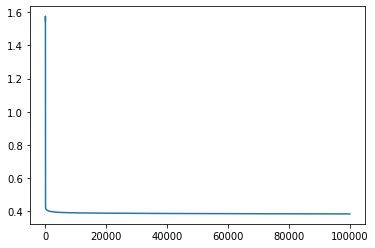

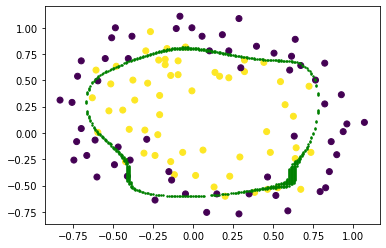

In [155]:
x,y,theta=main(10,0,15)
test(x,y,theta,15)

## lamda设置为1，最高阶设置为15时的情况
可以看见，当加入正则化后，决策边界开始变得比较圆润，不那么过拟合了  
虽然代价的最小值没有不加正则化的小，但是其决策边界更具有普遍性

C:\Users\23155\AppData\Local\Temp\ipykernel_4756\581862748.py:16: RuntimeWarning: divide by zero encountered in log
  return (((-y*np.log(hx)-(1-y)*np.log(1-hx)).sum()/x.shape[0])+(((theta.T@theta)*L)/(2*x.shape[0]))).sum()


代价最小 0.5449682670064168


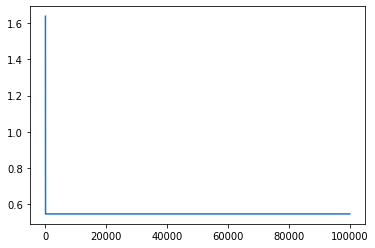

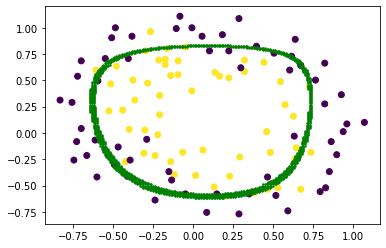

In [156]:
x,y,theta=main(5,1,15)
test(x,y,theta,15)

## 线性回归正规方程正则化实现
![image_1.jpg](./image_1.jpg)  
正规方程主要用来线性回归的，由于这里的老师给的数据集是一个逻辑回归问题  
于是就把实验一的单变量线性回归的数据集拿来这里用

In [ ]:
#获取数据
from turtle import color


def getData_2(power):
    data=np.array(pd.read_csv('ex1data1.txt',header=None))
    x=np.ones((data.shape[0],1))
    for i in range(power):
        x=np.append(x,np.power(data[:,0].reshape(-1,1),i+1),axis=1)
    y=data[:,1].reshape(-1,1)
    theta=np.zeros((power+1,1))
    return x,y,theta

def normal_equations(x,y,L,power):
    eye=np.eye(power+1,dtype=float)
    eye[0,0]=0
    temp=x.T@x+L*np.eye(power+1,dtype=float)
    temp=np.linalg.inv(temp)
    return temp@x.T@y

def main_2(L,power):
    x,y,theta=getData_2(power)
    theta=normal_equations(x,y,L,power)
    print("正规方程求的结果",theta)
    test_2(x,y,theta,power)

def test_2(x,y,theta,power):
    plt.scatter(x[:,1],y)
    nums=np.arange(5,22,0.01).reshape(-1,1)
    x_test=np.ones((nums.shape[0],1))
    for i in range(power):
        x_test=np.append(x_test,np.power(nums,i+1),axis=1)
    plt.plot(nums,x_test@theta,color="red")



    plt.show()

## lamda设置为0，最高阶依次设置为1,5,9
可以看见，随着最高阶逐渐的增大，拟合的越来越好，开始出现过拟合  
最高阶为9的时候，为了拟合最后的几个点，出现了大幅度的震荡  
虽然拟合的比较好，但是只能较好的拟合现有的数据集，不具有普适性

正规方程求的结果 [[-3.89578088]
 [ 1.19303364]]


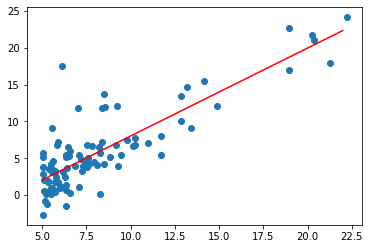

正规方程求的结果 [[-5.28159211e+01]
 [ 2.36839561e+01]
 [-3.81799896e+00]
 [ 3.00290028e-01]
 [-1.10518629e-02]
 [ 1.53958297e-04]]


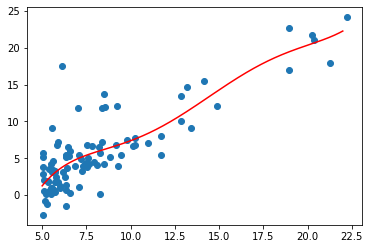

正规方程求的结果 [[-3.32994377e+03]
 [ 3.00011155e+03]
 [-1.16287583e+03]
 [ 2.54185727e+02]
 [-3.44976545e+01]
 [ 3.01552688e+00]
 [-1.69940624e-01]
 [ 5.96260394e-03]
 [-1.18398217e-04]
 [ 1.01565227e-06]]


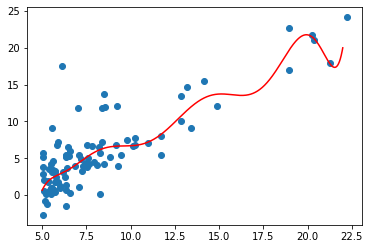

In [169]:
main_2(0,1)
main_2(0,5)
main_2(0,9)

## lamda设置为1,最高阶依然为9时
可以发现，拟合的曲线幅度减小了，变得比lamda=0的时候更普适了

正规方程求的结果 [[-2.06578927e-01]
 [-4.94283742e-01]
 [-6.12147521e-01]
 [ 3.97106232e-01]
 [-7.39441420e-02]
 [ 6.56240576e-03]
 [-3.10308150e-04]
 [ 8.21781557e-06]
 [-1.31886305e-07]
 [ 1.26312505e-09]]


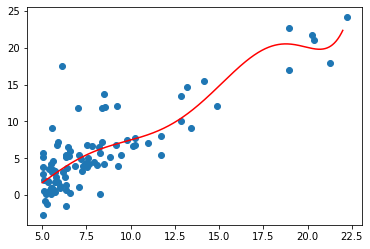

In [178]:
main_2(1,9)